In [40]:
print("Shah Mohammad Rizvi")

Shah Mohammad Rizvi


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lens-guard/LENS_Guard/Test/Smart Grid Real-Time Load Monitoring Dataset/smart_grid_dataset.csv
/kaggle/input/lens-guard/LENS_Guard/Train/Network Intrusion Detection (2024)/BCCC-CIC-IDS2017.md5
/kaggle/input/lens-guard/LENS_Guard/Train/Network Intrusion Detection (2024)/BCCC-CIC-IDS2017/BCCC-CIC-IDS-2017/web_xss.csv
/kaggle/input/lens-guard/LENS_Guard/Train/Network Intrusion Detection (2024)/BCCC-CIC-IDS2017/BCCC-CIC-IDS-2017/web_sql_injection.csv
/kaggle/input/lens-guard/LENS_Guard/Train/Network Intrusion Detection (2024)/BCCC-CIC-IDS2017/BCCC-CIC-IDS-2017/ssh_patator-new.csv
/kaggle/input/lens-guard/LENS_Guard/Train/Network Intrusion Detection (2024)/BCCC-CIC-IDS2017/BCCC-CIC-IDS-2017/NetFlow-vs-CIC-flows_number.png
/kaggle/input/lens-guard/LENS_Guard/Train/Network Intrusion Detection (2024)/BCCC-CIC-IDS2017/BCCC-CIC-IDS-2017/tuesday_benign.csv
/kaggle/input/lens-guard/LENS_Guard/Train/Network Intrusion Detection (2024)/BCCC-CIC-IDS2017/BCCC-CIC-IDS-2017/monday_benign.cs

In [2]:
import glob
import time

# --- 1. Load and Concatenate BCCC-CIC-IDS2017 Dataset ---

# Define the path to the directory containing all the training CSVs
# This path is based on your output from the first cell
train_data_path = "/kaggle/input/lens-guard/LENS_Guard/Train/Network Intrusion Detection (2024)/BCCC-CIC-IDS2017/BCCC-CIC-IDS-2017/"

# Use glob to find all files ending with .csv in that directory
all_csv_files = glob.glob(train_data_path + "*.csv")

print(f"Found {len(all_csv_files)} CSV files to load.")
print("---")

# List to hold all the individual dataframes
df_list = []

start_time = time.time()

# Loop through each file, load it, and append to the list
for file in all_csv_files:
    print(f"Loading {file.split('/')[-1]}...")
    try:
        df_part = pd.read_csv(file)
        df_list.append(df_part)
    except Exception as e:
        print(f"Could not read {file}: {e}")

# Concatenate all dataframes in the list into one single dataframe
if df_list:
    df_train = pd.concat(df_list, ignore_index=True)
    end_time = time.time()
    
    print("\n---")
    print(f"All files loaded and concatenated successfully in {end_time - start_time:.2f} seconds.")
    print("---")
    
    # Display the shape and first 5 rows of the combined dataframe
    print(f"Combined DataFrame Shape: {df_train.shape}")
    print("\nCombined DataFrame Head:")
    print(df_train.head())
    
    print("\nCombined DataFrame Info (to check data types and non-null counts):")
    df_train.info()

else:
    print("No dataframes were loaded. Please check the path.")

Found 18 CSV files to load.
---
Loading web_xss.csv...
Loading web_sql_injection.csv...
Loading ssh_patator-new.csv...
Loading tuesday_benign.csv...
Loading monday_benign.csv...
Loading web_brute_force.csv...
Loading dos_slowloris.csv...
Loading dos_golden_eye.csv...
Loading heartbleed.csv...
Loading friday_benign.csv...
Loading wednesday_benign.csv...
Loading thursday_benign.csv...
Loading botnet_ares.csv...
Loading dos_hulk.csv...
Loading ftp_patator.csv...
Loading dos_slowhttptest.csv...
Loading ddos_loit.csv...
Loading portscan.csv...

---
All files loaded and concatenated successfully in 63.68 seconds.
---
Combined DataFrame Shape: (2438052, 122)

Combined DataFrame Head:
                                             flow_id  \
0  172.16.0.1_52120_192.168.10.50_80_TCP_2017-07-...   
1  172.16.0.1_52100_192.168.10.50_80_TCP_2017-07-...   
2  172.16.0.1_52118_192.168.10.50_80_TCP_2017-07-...   
3  172.16.0.1_52098_192.168.10.50_80_TCP_2017-07-...   
4  172.16.0.1_52222_192.168.10.50_

In [3]:
import numpy as np

print("--- 2. Data Cleaning and Label Inspection ---")

# --- 2.1 Identify Object (Non-Numeric) Columns ---
object_cols = df_train.select_dtypes(include='object').columns
print(f"Found {len(object_cols)} object columns:")
print(list(object_cols))
print("---")


# --- 2.2 Inspect Label Distribution ---
print("Label distribution (value_counts):")
# This shows us all unique attack types and how many samples of each we have
label_counts = df_train['label'].value_counts()
print(label_counts)
print("---")


# --- 2.3 Check for NaN and Infinite Values ---
print("Checking for missing (NaN) and infinite (inf) values...")

# Check for NaN values
nan_count = df_train.isna().sum().sum()
print(f"Total NaN values in DataFrame: {nan_count}")

# Check for Infinite values
# We replace inf with NaN first, then count them
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
inf_count = df_train.isna().sum().sum() - nan_count # Count the newly added NaNs
print(f"Total Infinite values (inf, -inf) in DataFrame: {inf_count}")

if nan_count > 0 or inf_count > 0:
    print("\nAction: Will drop rows with NaN/Infinite values in the next step.")
else:
    print("\nSuccess: No NaN or Infinite values found.")

print("---")
# Show the info again to see if memory usage changed after replacing inf
print("DataFrame info after replacing infinite values:")
df_train.info()

--- 2. Data Cleaning and Label Inspection ---
Found 6 object columns:
['flow_id', 'timestamp', 'src_ip', 'dst_ip', 'protocol', 'label']
---
Label distribution (value_counts):
label
Benign               1786239
DoS_Hulk              349240
Port_Scan             161323
DDoS_LOIT              95733
FTP-Patator             9531
DoS_GoldenEye           8364
DoS_Slowhttptest        6860
SSH-Patator             5949
Botnet_ARES             5508
DoS_Slowloris           5177
Web_Brute_Force         2734
Web_XSS                 1358
Web_SQL_Injection         24
Heartbleed                12
Name: count, dtype: int64
---
Checking for missing (NaN) and infinite (inf) values...
Total NaN values in DataFrame: 0
Total Infinite values (inf, -inf) in DataFrame: 0

Success: No NaN or Infinite values found.
---
DataFrame info after replacing infinite values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438052 entries, 0 to 2438051
Columns: 122 entries, flow_id to label
dtypes: float64(61), int64(55)

In [4]:
print("--- 3. Feature Engineering and Preprocessing ---")

# We will work on a copy to keep the original df_train safe
df_clean = df_train.copy()

# --- 3.1 Drop Irrelevant Identifier Columns ---
cols_to_drop = ['flow_id', 'timestamp', 'src_ip', 'dst_ip']

try:
    df_clean = df_clean.drop(columns=cols_to_drop)
    print(f"Successfully dropped columns: {cols_to_drop}")
    print(f"New DataFrame shape: {df_clean.shape}")
except KeyError as e:
    print(f"Could not drop columns, error: {e}. They might have been dropped already.")

print("---")

# --- 3.2 Binary Label Encoding ---
# We will convert the multi-class 'label' column into a binary (0 or 1) column.
# 0 = Benign
# 1 = Attack (any non-Benign label)

print("Original 'label' value counts:")
print(df_clean['label'].value_counts().head()) # Show top 5 labels

# Apply the binary mapping
df_clean['label'] = df_clean['label'].apply(lambda x: 0 if x == 'Benign' else 1)

print("\nNew binary 'label' value counts (0=Benign, 1=Attack):")
print(df_clean['label'].value_counts())
print("---")


# --- 3.3 One-Hot Encoding for 'protocol' ---
print(f"Original shape before one-hot encoding: {df_clean.shape}")

# Check unique values in 'protocol'
protocol_values = df_clean['protocol'].unique()
print(f"Unique 'protocol' values: {protocol_values}")

# Use pandas.get_dummies to one-hot encode the 'protocol' column
# This will create new columns (e.g., proto_TCP, proto_UDP)
df_clean = pd.get_dummies(df_clean, columns=['protocol'], prefix='proto')

print(f"Shape after one-hot encoding: {df_clean.shape}")
print("---")

# --- Final Check ---
print("DataFrame head after preprocessing:")
print(df_clean.head())

print("\nDataFrame info after preprocessing (all columns should be numeric):")
df_clean.info()

--- 3. Feature Engineering and Preprocessing ---
Successfully dropped columns: ['flow_id', 'timestamp', 'src_ip', 'dst_ip']
New DataFrame shape: (2438052, 118)
---
Original 'label' value counts:
label
Benign         1786239
DoS_Hulk        349240
Port_Scan       161323
DDoS_LOIT        95733
FTP-Patator       9531
Name: count, dtype: int64

New binary 'label' value counts (0=Benign, 1=Attack):
label
0    1786239
1     651813
Name: count, dtype: int64
---
Original shape before one-hot encoding: (2438052, 118)
Unique 'protocol' values: ['TCP' 'UDP']
Shape after one-hot encoding: (2438052, 119)
---
DataFrame head after preprocessing:
   src_port  dst_port  duration  packets_count  fwd_packets_count  \
0     52120        80  5.638665              5                  3   
1     52100        80  5.946011              5                  3   
2     52118        80  5.638769              5                  3   
3     52098        80  6.075960             29                 17   
4     52222     

In [5]:
from sklearn.model_selection import train_test_split

print("--- 4. Creating Training and Test Sets ---")

# --- 4.1 Convert boolean columns to int ---
# This is good practice for some ML frameworks
bool_cols = df_clean.select_dtypes(include='bool').columns
df_clean[bool_cols] = df_clean[bool_cols].astype(int)

print(f"Converted {list(bool_cols)} to integer type.")
print(df_clean.head())
print("---")

# --- 4.2 Separate features (X) and label (y) ---
try:
    X = df_clean.drop(columns=['label'])
    y = df_clean['label']
    
    print("Separated features (X) and label (y).")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    print("---")

    # --- 4.3 Perform 80/20 Train-Test Split ---
    # We use stratify=y to ensure the 80/20 split maintains the
    # same percentage of benign (0) and attack (1) samples
    # in both the train and test sets. This is crucial for imbalanced data.
    # random_state=42 ensures the split is reproducible.
    
    print("Splitting data into 80% train and 20% test sets...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42, 
        stratify=y
    )

    print("Split complete.")
    print(f"       X_train shape: {X_train.shape}")
    print(f"       y_train shape: {y_train.shape}")
    print(f"        X_test shape: {X_test.shape}")
    print(f"        y_test shape: {y_test.shape}")
    print("---")

    # --- 4.4 Check Label Distribution in Splits ---
    print("Checking label distribution in new splits (to confirm stratification):")
    
    print("\ny_train value counts (0=Benign, 1=Attack):")
    print(y_train.value_counts(normalize=True))
    
    print("\ny_test value counts (0=Benign, 1=Attack):")
    print(y_test.value_counts(normalize=True))
    print("---")

except Exception as e:
    print(f"An error occurred: {e}")
    print("Perhaps 'label' column is not found? Make sure previous steps ran.")

--- 4. Creating Training and Test Sets ---
Converted ['proto_TCP', 'proto_UDP'] to integer type.
   src_port  dst_port  duration  packets_count  fwd_packets_count  \
0     52120        80  5.638665              5                  3   
1     52100        80  5.946011              5                  3   
2     52118        80  5.638769              5                  3   
3     52098        80  6.075960             29                 17   
4     52222        80  3.607804              5                  3   

   bwd_packets_count  total_payload_bytes  fwd_total_payload_bytes  \
0                  2                    0                        0   
1                  2                    0                        0   
2                  2                    0                        0   
3                 12                15748                     2615   
4                  2                    0                        0   

   bwd_total_payload_bytes  payload_bytes_max  ...  bwd_packets_IAT

In [6]:
from sklearn.preprocessing import MinMaxScaler
import warnings

# Suppress a harmless warning that may appear when scaling
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

print("--- 5. Scaling Data ---")

# --- 5.1 Initialize and Fit Scaler ---
# We will scale all 118 feature columns
scaler = MinMaxScaler()

print("Fitting scaler ON-LY on X_train data...")
# Fit and transform X_train
# We re-wrap the output in a DataFrame to keep the column names
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)
print("X_train has been scaled.")
print("---")

# --- 5.2 Transform X_test ---
print("Transforming X_test using the scaler fitted on X_train...")
# Only transform X_test
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)
print("X_test has been scaled.")
print("---")

# --- 5.3 Verification ---
print("Verification: Scaled X_train head (all values should be 0-1):")
print(X_train_scaled.head())

print("\nVerification: Scaled X_train description (min/max should be 0/1):")
# We use .describe() to check the min and max of a few columns
print(X_train_scaled[['src_port', 'duration', 'fwd_total_payload_bytes']].describe())

# Restore warnings
warnings.filterwarnings('default')

--- 5. Scaling Data ---
Fitting scaler ON-LY on X_train data...
X_train has been scaled.
---
Transforming X_test using the scaler fitted on X_train...
X_test has been scaled.
---
Verification: Scaled X_train head (all values should be 0-1):
         src_port  dst_port      duration  packets_count  fwd_packets_count  \
1538418  0.918963  0.000794  7.980627e-07   4.054553e-07       9.557123e-07   
239715   0.573314  0.590170  8.096300e-09   8.109106e-07       0.000000e+00   
596375   0.816271  0.000794  8.379196e-07   1.216366e-06       1.911425e-06   
755156   0.645896  0.001206  2.036453e-03   8.514562e-06       1.146855e-05   
1064557  0.935339  0.000794  5.210412e-09   1.216366e-06       1.911425e-06   

         bwd_packets_count  total_payload_bytes  fwd_total_payload_bytes  \
1538418       7.042080e-07         5.019294e-08                 0.000012   
239715        2.112624e-06         0.000000e+00                 0.000000   
596375        1.408416e-06         1.108156e-07         

In [7]:
#print("--- 5.6: Upgrading BOTH scikit-learn and imbalanced-learn ---")
#!pip install --upgrade scikit-learn imbalanced-learn
#print("--- Upgrade complete. ---")
#print("\n>>> IMPORTANT: Please RESTART THE SESSION now. <<<")
#print(">>> (In Kaggle: Click the 🔄 'Restart Session' button) <<<")
#print(">>> After restarting, re-run all cells from Step 1 to Step 5. <<<")

In [8]:
from imblearn.under_sampling import RandomUnderSampler
import gc # Garbage Collector

print("--- 6. Handling Class Imbalance (Undersampling) & Preparing VAE Data ---")

# --- 6.1 Create Balanced Dataset for Classifier (Student CNN) ---

# We'll aim for a 40% minority (Attack) to 60% majority (Benign) ratio
# This means sampling_strategy = 0.66 (approx 0.40 / 0.60)
undersampler = RandomUnderSampler(sampling_strategy=0.66, random_state=42)

print(f"Original training shape: {X_train_scaled.shape}")
print("Original y_train distribution:")
print(y_train.value_counts())
print("\nApplying RandomUnderSampler (aiming for ~60/40 Benign/Attack ratio)...")

# Fit and resample
X_resampled, y_resampled = undersampler.fit_resample(X_train_scaled, y_train)

print("\n--- Classifier Training Set (Resampled) ---")
print(f"New resampled X shape: {X_resampled.shape}")
print("New resampled y distribution:")
print(y_resampled.value_counts())
print("---")


# --- 6.2 Create Benign-Only Dataset for VAE ---
print("\nExtracting benign-only samples for VAE training...")

# Select only the rows from the original scaled training set where the label is 0 (Benign)
X_train_benign_vae = X_train_scaled[y_train == 0]

print("\n--- VAE Training Set (Benign-Only) ---")
print(f"VAE training data shape: {X_train_benign_vae.shape}")
print(f"(This should match the original Benign count: {y_train.value_counts()[0]})")
print("---")


# --- 6.3 Clean up memory ---
# We no longer need the original large dataframes
print("\nCleaning up large, unscaled dataframes from memory...")
try:
    del df_train
    del df_clean
    del X_train
    del X_test
    del X
    del y
    gc.collect() # Run garbage collection
    print("Memory cleaned.")
except NameError:
    print("Variables already deleted.")

--- 6. Handling Class Imbalance (Undersampling) & Preparing VAE Data ---
Original training shape: (1950441, 118)
Original y_train distribution:
label
0    1428991
1     521450
Name: count, dtype: int64

Applying RandomUnderSampler (aiming for ~60/40 Benign/Attack ratio)...

--- Classifier Training Set (Resampled) ---
New resampled X shape: (1311525, 118)
New resampled y distribution:
label
0    790075
1    521450
Name: count, dtype: int64
---

Extracting benign-only samples for VAE training...

--- VAE Training Set (Benign-Only) ---
VAE training data shape: (1428991, 118)
(This should match the original Benign count: 1428991)
---

Cleaning up large, unscaled dataframes from memory...
Memory cleaned.


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

print("--- 7. Reshaping Data for 1D CNN & VAE ---")

# --- 7.1 Define Feature Count ---
# This should be 118 from our previous steps
N_FEATURES = X_resampled.shape[1]
print(f"Number of features: {N_FEATURES}")

# --- 7.2 Reshape Feature Sets (X) ---
# We use .values to get the underlying NumPy array before reshaping

print("\nReshaping X data...")

# Classifier training data
X_train_cnn = X_resampled.values.reshape(-1, N_FEATURES, 1)

# VAE training data
X_train_vae = X_train_benign_vae.values.reshape(-1, N_FEATURES, 1)

# Final Test data (from the original scaled set)
X_test_cnn = X_test_scaled.values.reshape(-1, N_FEATURES, 1)

print(f"       New X_train_cnn shape: {X_train_cnn.shape}")
print(f"       New X_train_vae shape: {X_train_vae.shape}")
print(f"        New X_test_cnn shape: {X_test_cnn.shape}")
print("---")

# --- 7.3 Convert Labels to NumPy Arrays (y) ---
print("Converting y labels to NumPy arrays...")

y_train_cnn = y_resampled.values
y_test_cnn = y_test.values

print(f"       New y_train_cnn shape: {y_train_cnn.shape}")
print(f"        New y_test_cnn shape: {y_test_cnn.shape}")
print("---")

# --- 7.4 Clean up memory ---
print("\nCleaning up 2D dataframes from memory...")
try:
    del X_resampled
    del y_resampled
    del X_train_benign_vae
    del X_test_scaled
    del X_train_scaled # This was the large original scaled training set
    del y_train # This was the original unbalanced y_train
    del y_test # This was the pandas Series version
    gc.collect()
    print("Memory cleaned.")
except NameError:
    print("Variables already deleted.")

2025-11-10 15:03:13.747641: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762786993.979416     101 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762786994.049303     101 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

--- 7. Reshaping Data for 1D CNN & VAE ---
Number of features: 118

Reshaping X data...
       New X_train_cnn shape: (1311525, 118, 1)
       New X_train_vae shape: (1428991, 118, 1)
        New X_test_cnn shape: (487611, 118, 1)
---
Converting y labels to NumPy arrays...
       New y_train_cnn shape: (1311525,)
        New y_test_cnn shape: (487611,)
---

Cleaning up 2D dataframes from memory...
Memory cleaned.


In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Reshape, Conv1DTranspose, Lambda, BatchNormalization, Activation
from tensorflow.keras.layers import GlobalAveragePooling1D, Multiply, Permute, Cropping1D
from tensorflow.keras import backend as K
from tensorflow.keras.losses import mse

print("--- 8. (v5 - Truly Final) Defining LENS-Guard Model Architectures ---")

N_FEATURES = 118  # This must match the shape from the previous step
LATENT_DIM = 16   

# --- 8.1 Define Attention Mechanism ---
# (This is unchanged)
def squeeze_excite_block(input_tensor):
    """Creates a Squeeze-and-Excite attention block."""
    filters = input_tensor.shape[-1] 
    se = GlobalAveragePooling1D()(input_tensor)
    se = Reshape((1, filters))(se)
    se = Dense(filters // 4, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)
    return Multiply()([input_tensor, se])

# --- 8.2 Define Stage A: Student 1D CNN Classifier ---
# (This model is unchanged)
def build_student_cnn(input_shape=(N_FEATURES, 1)):
    """Builds the lightweight Student 1D CNN model."""
    inputs = Input(shape=input_shape)
    x = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = squeeze_excite_block(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x) 
    model = Model(inputs, outputs, name="Student_CNN")
    return model

# --- 8.3 Define Stage B: Variational Autoencoder (VAE) ---
# (Encoder, Sampling, and Decoder are unchanged from the last fix)

# VAE Encoder
inputs_vae = Input(shape=(N_FEATURES, 1))
x = Conv1D(32, 3, activation='relu', padding='same', strides=2)(inputs_vae) # 118 -> 59
x = BatchNormalization()(x)
x = Conv1D(64, 3, activation='relu', padding='same', strides=2)(x) # 59 -> 30
x = BatchNormalization()(x)
x = Flatten()(x) # Shape (30*64 = 1920)
x = Dense(32, activation='relu')(x)
z_mean = Dense(LATENT_DIM, name='z_mean')(x)
z_log_var = Dense(LATENT_DIM, name='z_log_var')(x)

# VAE Sampling Layer
def sampling(args):
    """Reparameterization trick."""
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(LATENT_DIM,), name='z')([z_mean, z_log_var])
encoder = Model(inputs_vae, [z_mean, z_log_var, z], name='encoder')

# VAE Decoder
latent_inputs = Input(shape=(LATENT_DIM,))
x = Dense(30 * 64, activation='relu')(latent_inputs) # 1920
x = Reshape((30, 64))(x)
x = Conv1DTranspose(32, 3, activation='relu', padding='same', strides=2)(x) # 30 -> 60
x = BatchNormalization()(x)
x = Conv1DTranspose(1, 3, activation='sigmoid', padding='same', strides=2)(x) # 60 -> 120
x = Cropping1D(cropping=(1, 1))(x) # 120 -> 118
outputs_vae = x
decoder = Model(latent_inputs, outputs_vae, name='decoder')

# VAE Model (Combined) - This class definition IS corrected
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.recon_loss_tracker = tf.keras.metrics.Mean(name="recon_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [self.total_loss_tracker, self.recon_loss_tracker, self.kl_loss_tracker]

    def call(self, data):
        """Defines the forward pass for inference."""
        z_mean, z_log_var, z = self.encoder(data)
        reconstruction = self.decoder(z)
        return reconstruction

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            
            recon_loss = tf.reduce_mean(
                tf.reduce_sum(tf.square(data - reconstruction), axis=(1, 2))
            )
            
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            
            total_loss = recon_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        
        self.total_loss_tracker.update_state(total_loss)
        self.recon_loss_tracker.update_state(recon_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        
        return {
            "loss": self.total_loss_tracker.result(),
            "recon_loss": self.recon_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    # --- THIS IS THE NEWLY ADDED METHOD ---
    def test_step(self, data):
        """The logic for validation.
        
        `fit()` will automatically use this for the validation_split.
        """
        if isinstance(data, tuple):
            data = data[0]

        # Forward pass
        z_mean, z_log_var, z = self.encoder(data)
        reconstruction = self.decoder(z)
        
        # Calculate losses
        recon_loss = tf.reduce_mean(
            tf.reduce_sum(tf.square(data - reconstruction), axis=(1, 2))
        )
        kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
        
        total_loss = recon_loss + kl_loss
        
        # Update trackers
        self.total_loss_tracker.update_state(total_loss)
        self.recon_loss_tracker.update_state(recon_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        
        # Return metrics
        return {
            "loss": self.total_loss_tracker.result(),
            "recon_loss": self.recon_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }
    # --- END OF ADDITION ---

# --- 8.4 Instantiate the Models and Print Summaries ---

# Instantiate Student CNN
student_model = build_student_cnn()
print("\n--- Student CNN Model Summary ---")
student_model.summary()

# Instantiate VAE
vae = VAE(encoder, decoder)
print("\n--- VAE Encoder Model Summary ---")
vae.encoder.summary()
print("\n--- VAE Decoder Model Summary ---")
vae.decoder.summary()

# Compile the VAE
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005))
print("\nVAE model compiled.")

--- 8. (v5 - Truly Final) Defining LENS-Guard Model Architectures ---

--- Student CNN Model Summary ---


Model: "Student_CNN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17      │ (None, 118, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_22 (Conv1D)  │ (None, 118, 32)   │        128 │ input_layer_17[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 118, 32)   │        128 │ conv1d_22[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_10    │ (None, 59, 32)    │          0 │ batch_normalizat… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_23 (Conv1D)  │ (None, 59, 64)    │      6,208 │ max_pooling1d_10… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 59, 64)    │        256 │ conv1d_23[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_11    │ (None, 29, 64)    │          0 │ batch_normalizat… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ max_pooling1d_11… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_11          │ (None, 1, 64)     │          0 │ global_average_p… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_32 (Dense)    │ (None, 1, 16)     │      1,040 │ reshape_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_33 (Dense)    │ (None, 1, 64)     │      1,088 │ dense_32[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_5          │ (None, 29, 64)    │          0 │ max_pooling1d_11… │
│ (Multiply)          │                   │            │ dense_33[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_11          │ (None, 1856)      │          0 │ multiply_5[0][0]  │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_34 (Dense)    │ (None, 64)        │    118,848 │ flatten_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_35 (Dense)    │ (None, 1)         │         65 │ dense_34[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 127,761 (499.07 KB)

 Trainable params: 127,569 (498.32 KB)

 Non-trainable params: 192 (768.00 B)


--- VAE Encoder Model Summary ---


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, 118, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_20 (Conv1D)  │ (None, 59, 32)    │        128 │ input_layer_15[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 59, 32)    │        128 │ conv1d_20[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_21 (Conv1D)  │ (None, 30, 64)    │      6,208 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 64)    │        256 │ conv1d_21[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_10          │ (None, 1920)      │          0 │ batch_normalizat… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_30 (Dense)    │ (None, 32)        │     61,472 │ flatten_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 16)        │        528 │ dense_30[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 16)        │        528 │ dense_30[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z (Lambda)          │ (None, 16)        │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 69,248 (270.50 KB)

 Trainable params: 69,056 (269.75 KB)

 Non-trainable params: 192 (768.00 B)


--- VAE Decoder Model Summary ---


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1920)           │        32,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_10 (Reshape)            │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_10             │ (None, 60, 32)         │         6,176 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 60, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_11             │ (None, 120, 1)         │            97 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cropping1d_3 (Cropping1D)       │ (None, 118, 1)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,041 (152.50 KB)

 Trainable params: 38,977 (152.25 KB)

 Non-trainable params: 64 (256.00 B)


VAE model compiled.


--- 9. Training Stage B: Variational Autoencoder (VAE) ---
Training VAE on 1428991 benign samples for 5 epochs...
Batch size: 512
Epoch 1/5
2233/2233 ━━━━━━━━━━━━━━━━━━━━ 106s 46ms/step - kl_loss: 0.6897 - loss: 6.2061 - recon_loss: 5.5164 - val_kl_loss: 1.4963 - val_loss: 2.5947 - val_recon_loss: 1.0984
Epoch 2/5
2233/2233 ━━━━━━━━━━━━━━━━━━━━ 95s 42ms/step - kl_loss: 1.4522 - loss: 2.5601 - recon_loss: 1.1079 - val_kl_loss: 1.4728 - val_loss: 2.5011 - val_recon_loss: 1.0283
Epoch 3/5
2233/2233 ━━━━━━━━━━━━━━━━━━━━ 95s 42ms/step - kl_loss: 1.4997 - loss: 2.4984 - recon_loss: 0.9986 - val_kl_loss: 1.5699 - val_loss: 2.4850 - val_recon_loss: 0.9152
Epoch 4/5
2233/2233 ━━━━━━━━━━━━━━━━━━━━ 95s 43ms/step - kl_loss: 1.5208 - loss: 2.4763 - recon_loss: 0.9555 - val_kl_loss: 1.5671 - val_loss: 2.4678 - val_recon_loss: 0.9006
Epoch 5/5
2233/2233 ━━━━━━━━━━━━━━━━━━━━ 95s 43ms/step - kl_loss: 1.5391 - loss: 2.4609 - recon_loss: 0.9218 - val_kl_loss: 1.5600 - val_loss: 2.4554 - val_recon_loss: 0

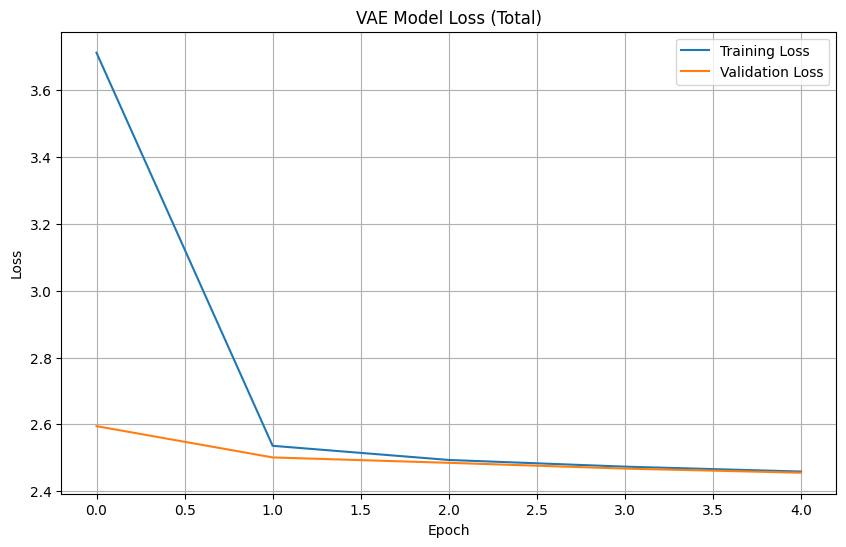

In [22]:
# (Run this as Step 9 AFTER running the corrected Step 8)
import time
import matplotlib.pyplot as plt

print("--- 9. Training Stage B: Variational Autoencoder (VAE) ---")

# Define training parameters
VAE_EPOCHS = 5
BATCH_SIZE = 512

print(f"Training VAE on {X_train_vae.shape[0]} benign samples for {VAE_EPOCHS} epochs...")
print(f"Batch size: {BATCH_SIZE}")

start_time = time.time()

# We use 20% of the benign data as a validation set to monitor the loss
history_vae = vae.fit(
    X_train_vae,
    epochs=VAE_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    verbose=1  # Show progress bar
)

end_time = time.time()
print(f"\nVAE training finished in {end_time - start_time:.2f} seconds.")

# --- Plot VAE Training Loss ---
print("\nPlotting VAE training and validation loss...")

try:
    plt.figure(figsize=(10, 6))
    plt.plot(history_vae.history['loss'], label='Training Loss')
    plt.plot(history_vae.history['val_loss'], label='Validation Loss')
    plt.title('VAE Model Loss (Total)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Could not plot VAE loss: {e}")

--- 10. Training Stage A: Student 1D CNN Classifier ---
Student CNN model compiled.

Training Student CNN on 1311525 balanced samples for 5 epochs...
Batch size: 512
Epoch 1/5
2050/2050 ━━━━━━━━━━━━━━━━━━━━ 147s 70ms/step - accuracy: 0.9589 - loss: 0.0892 - val_accuracy: 0.9844 - val_loss: 0.0261
Epoch 2/5
2050/2050 ━━━━━━━━━━━━━━━━━━━━ 144s 70ms/step - accuracy: 0.9943 - loss: 0.0180 - val_accuracy: 0.9869 - val_loss: 0.0317
Epoch 3/5
2050/2050 ━━━━━━━━━━━━━━━━━━━━ 146s 71ms/step - accuracy: 0.9959 - loss: 0.0138 - val_accuracy: 0.9903 - val_loss: 0.0208
Epoch 4/5
2050/2050 ━━━━━━━━━━━━━━━━━━━━ 148s 72ms/step - accuracy: 0.9964 - loss: 0.0122 - val_accuracy: 0.9895 - val_loss: 0.0291
Epoch 5/5
2050/2050 ━━━━━━━━━━━━━━━━━━━━ 149s 73ms/step - accuracy: 0.9966 - loss: 0.0116 - val_accuracy: 0.9901 - val_loss: 0.0237

Student CNN training finished in 741.08 seconds.

Plotting CNN training and validation accuracy/loss...


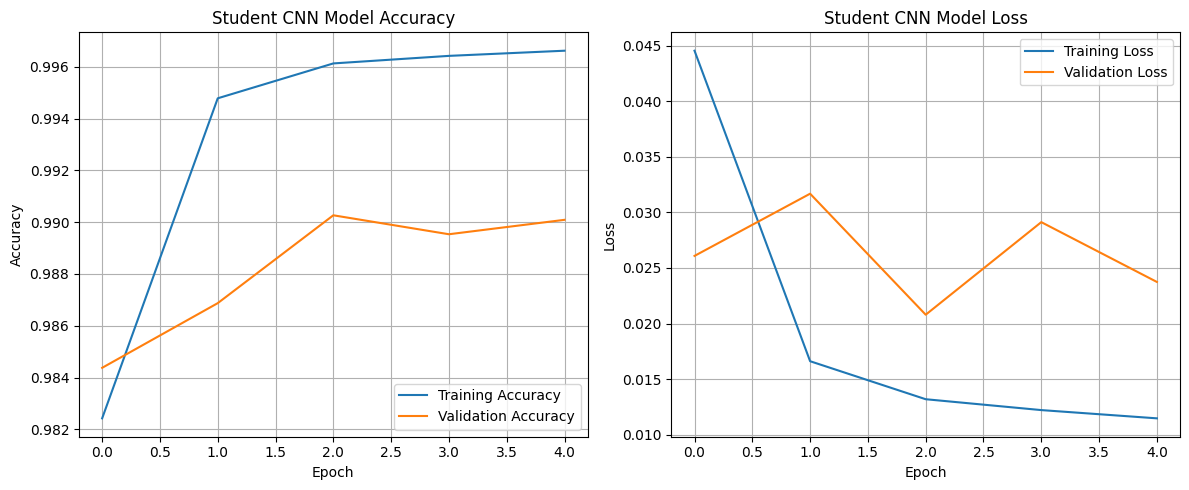

In [23]:
import time
import matplotlib.pyplot as plt

print("--- 10. Training Stage A: Student 1D CNN Classifier ---")

# --- 10.1 Compile the Student Model ---
student_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',  # Standard loss for 0/1 classification
    metrics=['accuracy']
)

print("Student CNN model compiled.")

# --- 10.2 Train the Student Model ---
CNN_EPOCHS = 5
BATCH_SIZE = 512

print(f"\nTraining Student CNN on {X_train_cnn.shape[0]} balanced samples for {CNN_EPOCHS} epochs...")
print(f"Batch size: {BATCH_SIZE}")

start_time = time.time()

# We use 20% of the balanced data as a validation set
history_cnn = student_model.fit(
    X_train_cnn,
    y_train_cnn,
    epochs=CNN_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    verbose=1  # Show progress bar
)

end_time = time.time()
print(f"\nStudent CNN training finished in {end_time - start_time:.2f} seconds.")

# --- 10.3 Plot CNN Training History ---
print("\nPlotting CNN training and validation accuracy/loss...")

try:
    # Plot Accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
    plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Student CNN Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history_cnn.history['loss'], label='Training Loss')
    plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
    plt.title('Student CNN Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Could not plot CNN history: {e}")

--- 11. Determining VAE Anomaly Threshold ---
Calculating reconstruction errors for all benign training samples...
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step
Calculated 1428991 reconstruction errors.

--- Anomaly Threshold ---
   Min error: 0.0010
  Mean error: 0.8935
   Max error: 27.1496
99th percentile (Threshold): 6.7755

Plotting distribution of benign reconstruction errors...


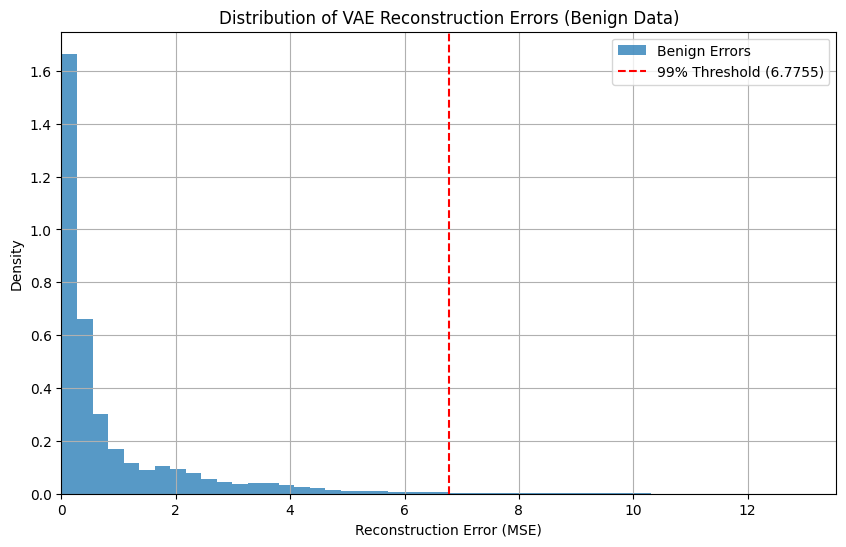


Cleaning up VAE training data from memory...
Memory cleaned.


In [24]:
import numpy as np

print("--- 11. Determining VAE Anomaly Threshold ---")

# --- 11.1 Calculate Reconstruction Errors on Benign Data ---
print("Calculating reconstruction errors for all benign training samples...")
# This will take a moment as it processes all 1.4M benign samples
reconstructions = vae.predict(X_train_vae, batch_size=BATCH_SIZE)

# Calculate the mean squared error (MSE) for each sample
# This is our "reconstruction error"
# We sum the squared errors across the 118 features
errors = np.sum(np.square(X_train_vae - reconstructions), axis=(1, 2))

print(f"Calculated {len(errors)} reconstruction errors.")

# --- 11.2 Determine the Threshold ---
# We set the threshold at the 99th percentile of the benign errors.
# This means 99% of "normal" traffic will be below this threshold.
anomaly_threshold = np.quantile(errors, 0.99)

print("\n--- Anomaly Threshold ---")
print(f"   Min error: {np.min(errors):.4f}")
print(f"  Mean error: {np.mean(errors):.4f}")
print(f"   Max error: {np.max(errors):.4f}")
print(f"99th percentile (Threshold): {anomaly_threshold:.4f}")

# --- 11.3 Plot Error Distribution ---
print("\nPlotting distribution of benign reconstruction errors...")

try:
    plt.figure(figsize=(10, 6))
    plt.hist(errors, bins=100, alpha=0.75, label='Benign Errors', density=True)
    plt.axvline(anomaly_threshold, color='r', linestyle='--', label=f'99% Threshold ({anomaly_threshold:.4f})')
    plt.title('Distribution of VAE Reconstruction Errors (Benign Data)')
    plt.xlabel('Reconstruction Error (MSE)')
    plt.ylabel('Density')
    plt.legend()
    # We set the x-limit to a reasonable value to see the distribution
    plt.xlim(0, anomaly_threshold * 2)
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Could not plot error distribution: {e}")

# --- 11.4 Clean up memory ---
print("\nCleaning up VAE training data from memory...")
try:
    del X_train_vae
    del reconstructions
    gc.collect()
    print("Memory cleaned.")
except NameError:
    print("Variables already deleted.")

--- 12. Evaluating Full LENS-Guard Framework on Test Data ---
Getting Stage A (CNN) predictions on test set...
953/953 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step
CNN Predictions shape: (487611,)
Getting Stage B (VAE) anomaly scores on test set...
953/953 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step
VAE Anomaly Predictions shape: (487611,)

Combining predictions with LENS-Guard hybrid logic...

--- LENS-Guard Final Performance ---
              precision    recall  f1-score   support

  Benign (0)       1.00      0.99      0.99    357248
  Attack (1)       0.97      0.99      0.98    130363

    accuracy                           0.99    487611
   macro avg       0.98      0.99      0.99    487611
weighted avg       0.99      0.99      0.99    487611


Plotting LENS-Guard Confusion Matrix...


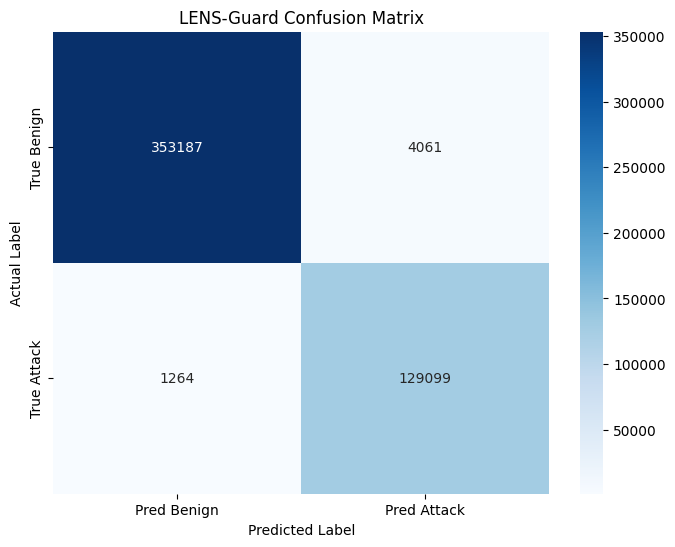

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("--- 12. Evaluating Full LENS-Guard Framework on Test Data ---")

# --- 12.1 Get Stage A (CNN) Predictions ---
print("Getting Stage A (CNN) predictions on test set...")
# .predict() gives probabilities (e.g., 0.98, 0.01)
y_pred_cnn_proba = student_model.predict(X_test_cnn, batch_size=BATCH_SIZE)
# Convert probabilities to binary 0 or 1, using 0.5 as the cutoff
y_pred_cnn = (y_pred_cnn_proba >= 0.5).astype(int).flatten()
print(f"CNN Predictions shape: {y_pred_cnn.shape}")

# --- 12.2 Get Stage B (VAE) Predictions ---
print("Getting Stage B (VAE) anomaly scores on test set...")
reconstructions_test = vae.predict(X_test_cnn, batch_size=BATCH_SIZE)
# Calculate reconstruction error for each test sample
errors_test = np.sum(np.square(X_test_cnn - reconstructions_test), axis=(1, 2))
# Convert errors to binary 0 or 1, using our threshold
y_pred_vae = (errors_test > anomaly_threshold).astype(int)
print(f"VAE Anomaly Predictions shape: {y_pred_vae.shape}")

# --- 12.3 Apply LENS-Guard Hybrid Logic ---
# (As described in Section 4.2)
# Final prediction is 1 (Attack) if:
#   EITHER the CNN predicts 1
#   OR the VAE predicts 1 (anomaly)
print("\nCombining predictions with LENS-Guard hybrid logic...")
y_pred_lens_guard = np.logical_or(y_pred_cnn == 1, y_pred_vae == 1).astype(int)

# --- 12.4 Final Evaluation (Section 6.1) ---
print("\n--- LENS-Guard Final Performance ---")
# y_test_cnn is the true, ground-truth labels
report = classification_report(
    y_test_cnn, 
    y_pred_lens_guard, 
    target_names=['Benign (0)', 'Attack (1)']
)
print(report)

# --- 12.5 Plot Confusion Matrix ---
print("\nPlotting LENS-Guard Confusion Matrix...")
try:
    cm = confusion_matrix(y_test_cnn, y_pred_lens_guard)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Pred Benign', 'Pred Attack'], 
                yticklabels=['True Benign', 'True Attack'])
    plt.title('LENS-Guard Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

except Exception as e:
    print(f"Could not plot confusion matrix: {e}")

In [26]:
import pandas as pd
import numpy as np

print("--- 13. Inter-Dataset Generalization Test ---")
print("--- Loading Smart Grid Dataset ---")

# Define the path
test_path = "/kaggle/input/lens-guard/LENS_Guard/Test/Smart Grid Real-Time Load Monitoring Dataset/smart_grid_dataset.csv"

# --- 13.1 Load the Data ---
try:
    df_test_grid = pd.read_csv(test_path)
    print(f"Successfully loaded {test_path}")
    print(f"Shape of new dataset: {df_test_grid.shape}")
    print("---")

    # --- 13.2 Inspect Columns and Data Types ---
    print("New Dataset Info (to check columns and types):")
    df_test_grid.info()
    print("---")

    # --- 13.3 Inspect Head (to see sample data) ---
    print("New Dataset Head:")
    print(df_test_grid.head())
    print("---")

    # --- 13.4 Inspect Labels ---
    # We need to find the 'label' column. Let's assume it's 'target' or 'class'
    # based on the .info() output, we'll know the column name.
    # Let's try to find a likely label column.
    
    label_col_name = None
    possible_names = ['target', 'class', 'label', 'labels']
    
    for name in possible_names:
        if name in df_test_grid.columns:
            label_col_name = name
            break
            
    if label_col_name:
        print(f"Found label column: '{label_col_name}'")
        print(f"Value counts for '{label_col_name}':")
        print(df_test_grid[label_col_name].value_counts())
    else:
        print("Could not automatically find a label column named 'target', 'class', or 'label'.")
        print("Please inspect the .info() and .head() output to identify the label column.")

except Exception as e:
    print(f"Could not load or inspect the file: {e}")

--- 13. Inter-Dataset Generalization Test ---
--- Loading Smart Grid Dataset ---
Successfully loaded /kaggle/input/lens-guard/LENS_Guard/Test/Smart Grid Real-Time Load Monitoring Dataset/smart_grid_dataset.csv
Shape of new dataset: (50000, 16)
---
New Dataset Info (to check columns and types):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Timestamp                    50000 non-null  object 
 1   Voltage (V)                  50000 non-null  float64
 2   Current (A)                  50000 non-null  float64
 3   Power Consumption (kW)       50000 non-null  float64
 4   Reactive Power (kVAR)        50000 non-null  float64
 5   Power Factor                 50000 non-null  float64
 6   Solar Power (kW)             50000 non-null  float64
 7   Wind Power (kW)              50000 non-null  float64
 8   Grid Supply

--- 15. Visualization 1: Original Data Distribution ---
Loading data to get original label counts...


is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead


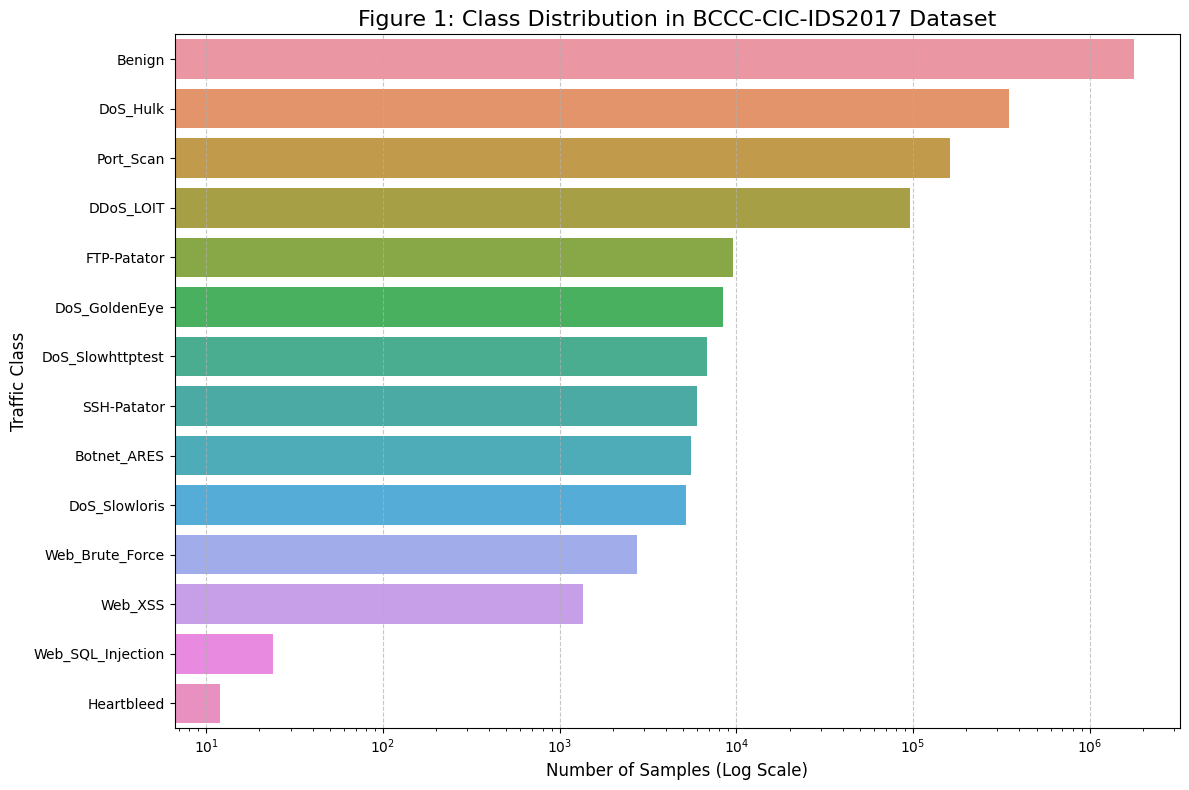

Plot created successfully.


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pandas as pd

print("--- 15. Visualization 1: Original Data Distribution ---")
print("Loading data to get original label counts...")

# We need to re-load the data to get this information, as it was
# deleted from memory. We will only load what we need.

try:
    # Define the path
    train_data_path = "/kaggle/input/lens-guard/LENS_Guard/Train/Network Intrusion Detection (2024)/BCCC-CIC-IDS2017/BCCC-CIC-IDS-2017/"
    all_csv_files = glob.glob(train_data_path + "*.csv")

    # List to hold just the 'label' column
    label_list = []
    
    for file in all_csv_files:
        # We only read the 'label' column to save memory
        df_part = pd.read_csv(file, usecols=['label'])
        label_list.append(df_part)

    # Concatenate all label dataframes
    df_labels = pd.concat(label_list, ignore_index=True)

    # --- Create the Plot ---
    plt.figure(figsize=(12, 8))
    # Get the value counts
    label_counts = df_labels['label'].value_counts()
    
    # Create a bar plot
    sns.barplot(
        x=label_counts.values, 
        y=label_counts.index, 
        orient='h'
    )
    
    plt.title('Figure 1: Class Distribution in BCCC-CIC-IDS2017 Dataset', fontsize=16)
    plt.xlabel('Number of Samples (Log Scale)', fontsize=12)
    plt.ylabel('Traffic Class', fontsize=12)
    
    # Use a log scale to make the small classes visible
    plt.xscale('log') 
    
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Clean up memory
    del df_labels
    del df_part
    del label_list
    print("Plot created successfully.")

except Exception as e:
    print(f"Could not create distribution plot: {e}")

--- 16. Visualization 2: Model Training Histories ---


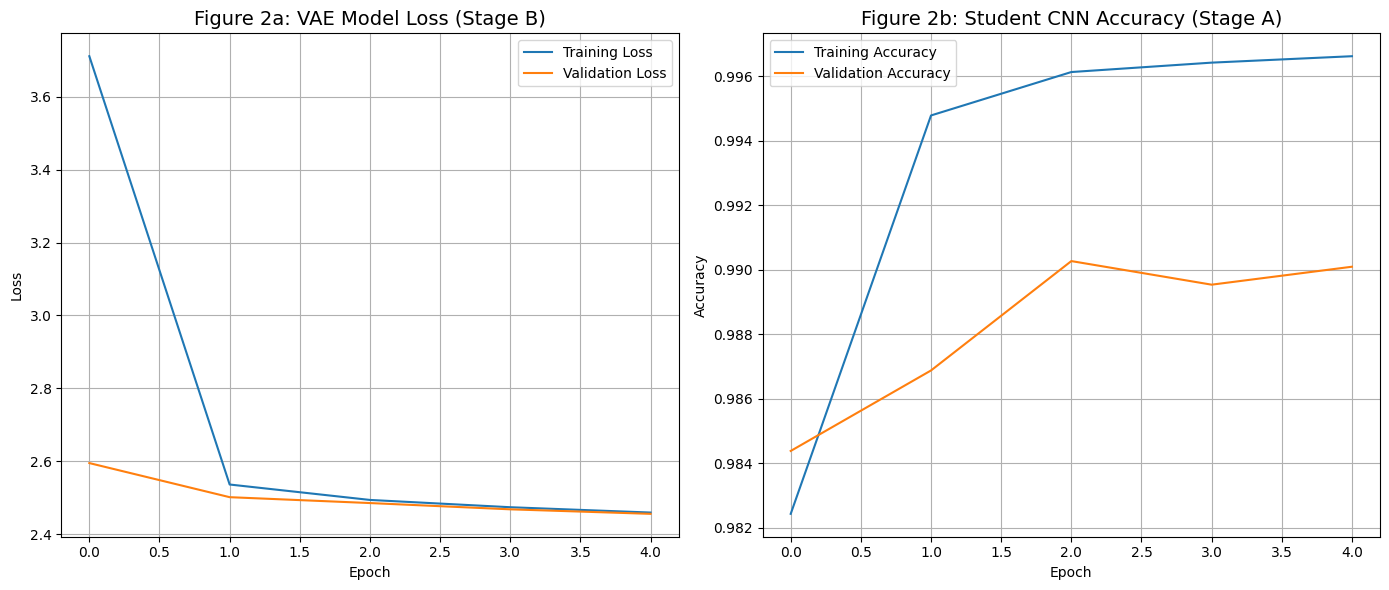

In [36]:
import matplotlib.pyplot as plt

print("--- 16. Visualization 2: Model Training Histories ---")

try:
    # --- Plot VAE Loss ---
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history_vae.history['loss'], label='Training Loss')
    plt.plot(history_vae.history['val_loss'], label='Validation Loss')
    plt.title('Figure 2a: VAE Model Loss (Stage B)', fontsize=14)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # --- Plot CNN Accuracy ---
    plt.subplot(1, 2, 2)
    plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
    plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Figure 2b: Student CNN Accuracy (Stage A)', fontsize=14)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

except NameError:
    print("Error: 'history_vae' or 'history_cnn' not found in memory.")
    print("Please re-run Step 9 and Step 10 if you restarted the kernel.")
except Exception as e:
    print(f"Could not plot training history: {e}")

--- 17. Visualization 3: Final Framework Performance ---


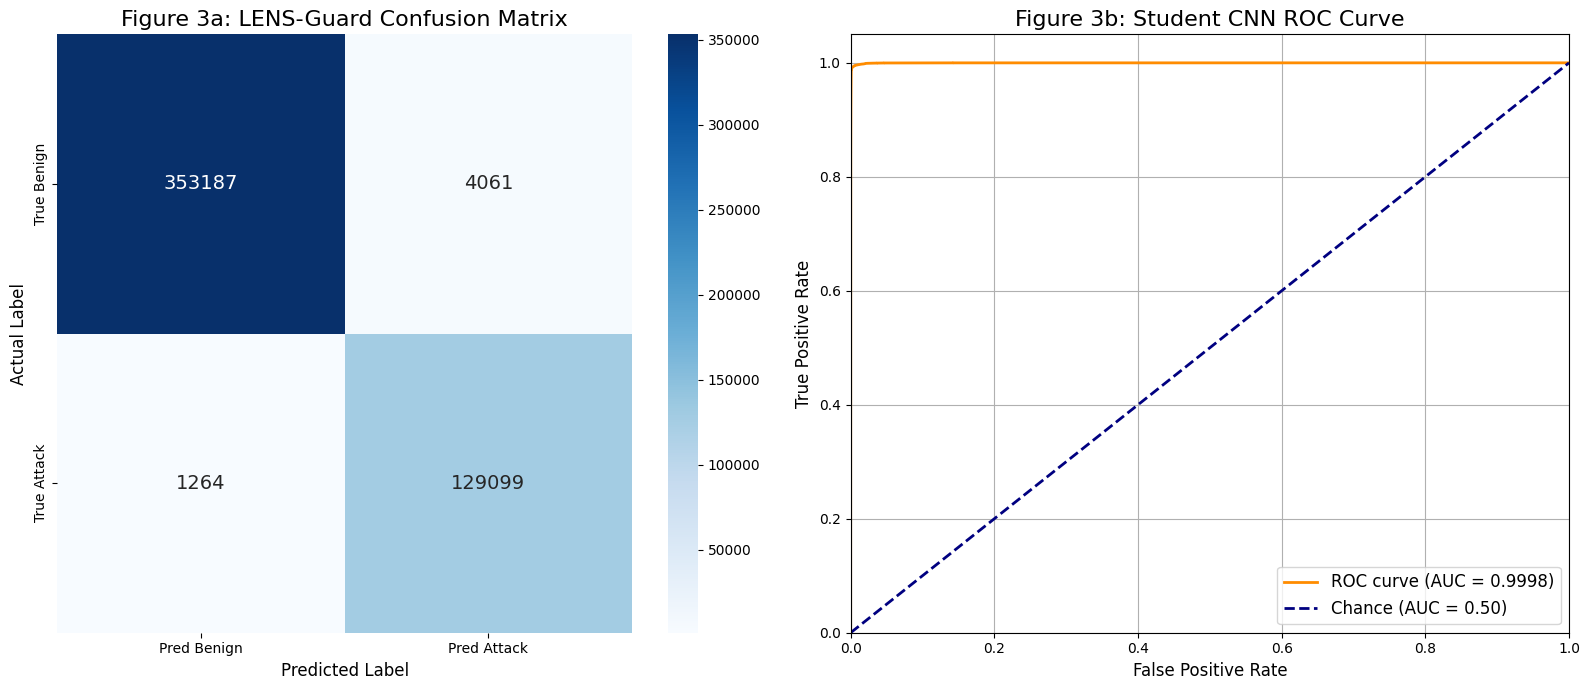

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print("--- 17. Visualization 3: Final Framework Performance ---")

# We use the variables from Step 12:
# y_test_cnn (True labels)
# y_pred_lens_guard (Final 0/1 predictions)
# y_pred_cnn_proba (The CNN's *probabilities*, needed for ROC)

try:
    # --- Plot Confusion Matrix ---
    cm = confusion_matrix(y_test_cnn, y_pred_lens_guard)
    plt.figure(figsize=(16, 7))
    
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Pred Benign', 'Pred Attack'], 
                yticklabels=['True Benign', 'True Attack'],
                annot_kws={"size": 14})
    plt.title('Figure 3a: LENS-Guard Confusion Matrix', fontsize=16)
    plt.ylabel('Actual Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)

    # --- Plot ROC Curve ---
    # We will use the CNN's raw probabilities as the "score"
    # Note: We use the *CNN's* probabilities here, as the VAE
    # doesn't provide a score, and the CNN is the main driver.
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_cnn, y_pred_cnn_proba)
    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance (AUC = 0.50)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Figure 3b: Student CNN ROC Curve', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

except NameError:
    print("Error: Required variables (y_test_cnn, etc.) not in memory.")
    print("Please re-run Step 12 if you restarted the kernel.")
except Exception as e:
    print(f"Could not plot final results: {e}")

--- 18. Saving All Paper Visualizations ---
Generating and saving Figure 1 (Data Distribution)...


is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead


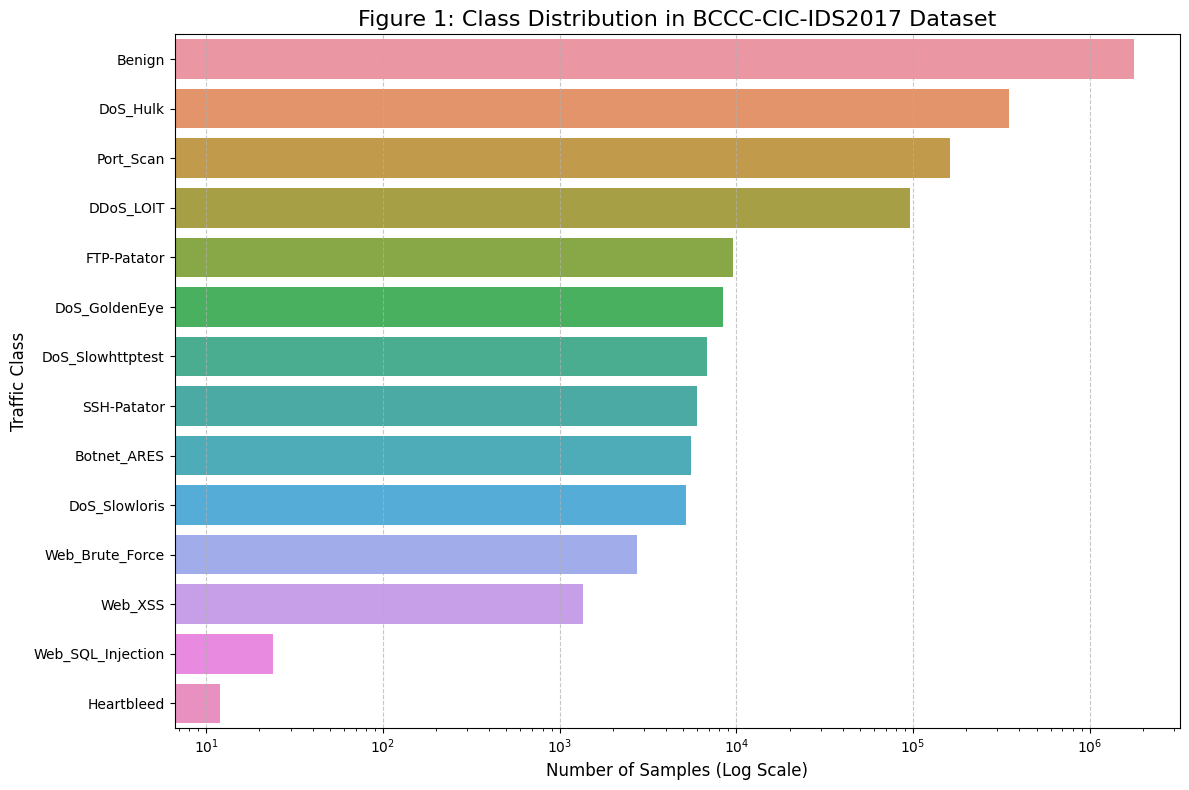


Generating and saving Figure 2 (Training History)...


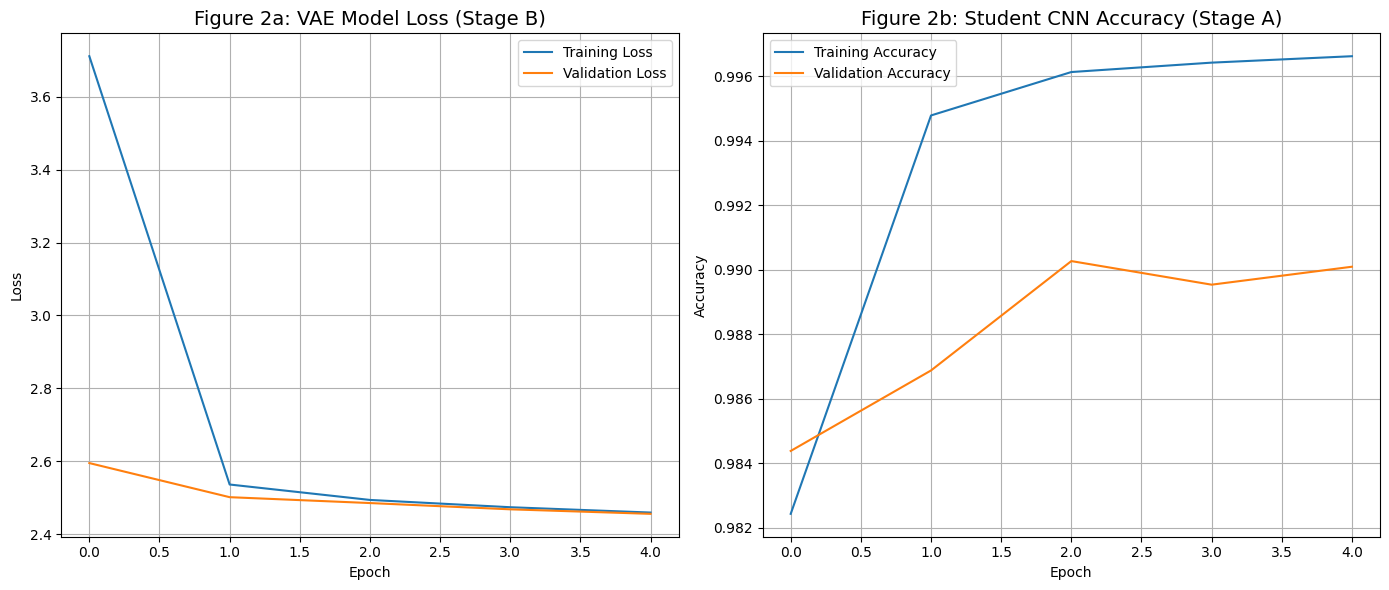


Generating and saving Figure 3 (Final Performance)...


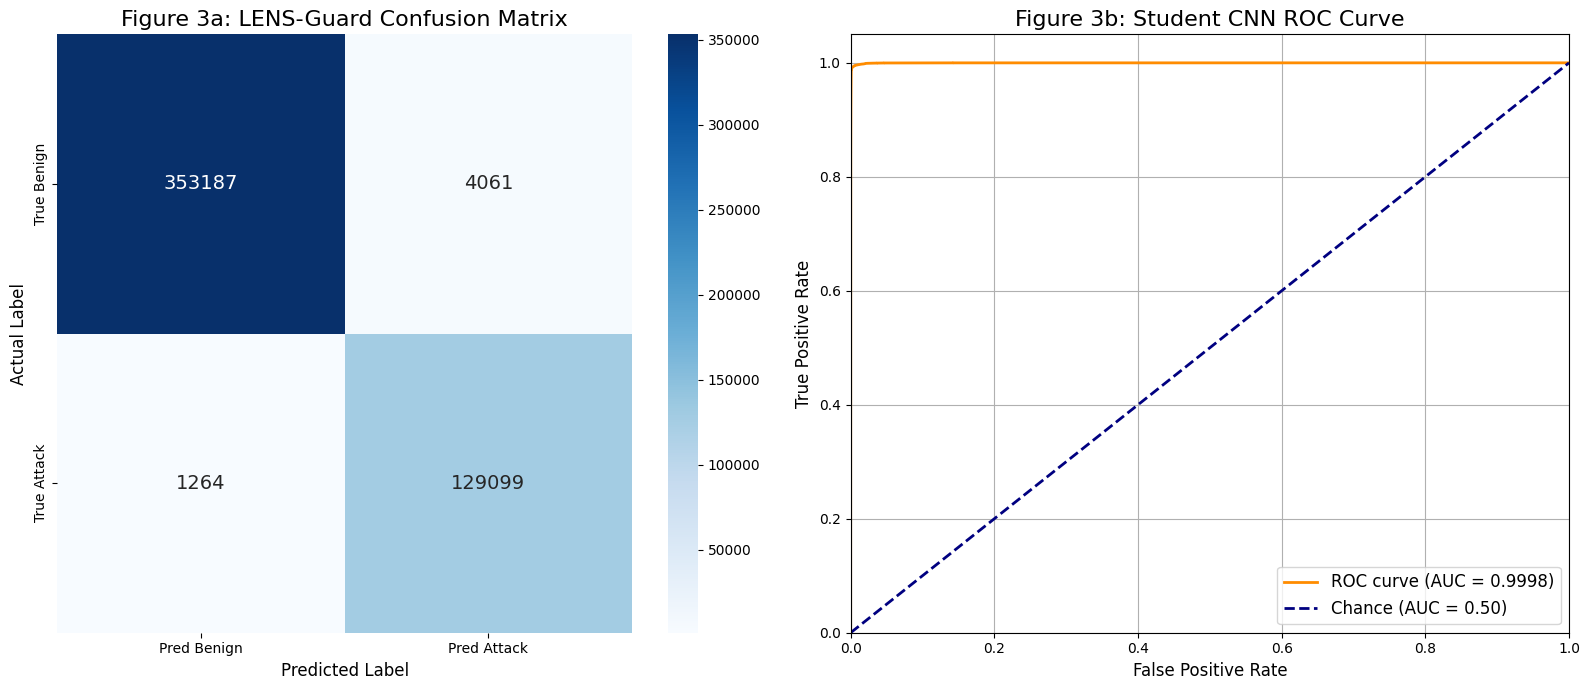


--- All Figures Saved! ---
Your files are now in /kaggle/working/:
- figure_1_distribution.png
- figure_2_training_history.png
- figure_3_final_performance.png

You can now download them from the 'Data' -> 'Output' tab in the sidebar.


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pandas as pd
import numpy as np
import os
from sklearn.metrics import confusion_matrix, roc_curve, auc

print("--- 18. Saving All Paper Visualizations ---")

# We will save at 300 DPI for high-quality publication
SAVE_DPI = 300

# --- Figure 1: Data Distribution ---
print("Generating and saving Figure 1 (Data Distribution)...")
try:
    # 1.1. Re-load data for labels
    train_data_path = "/kaggle/input/lens-guard/LENS_Guard/Train/Network Intrusion Detection (2024)/BCCC-CIC-IDS2017/BCCC-CIC-IDS-2017/"
    all_csv_files = glob.glob(train_data_path + "*.csv")
    label_list = []
    for file in all_csv_files:
        label_list.append(pd.read_csv(file, usecols=['label']))
    df_labels = pd.concat(label_list, ignore_index=True)
    label_counts = df_labels['label'].value_counts()

    # 1.2. Create Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(x=label_counts.values, y=label_counts.index, orient='h')
    plt.title('Figure 1: Class Distribution in BCCC-CIC-IDS2017 Dataset', fontsize=16)
    plt.xlabel('Number of Samples (Log Scale)', fontsize=12)
    plt.ylabel('Traffic Class', fontsize=12)
    plt.xscale('log') 
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # 1.3. Save Figure
    plt.savefig('figure_1_distribution.png', dpi=SAVE_DPI, bbox_inches='tight')
    plt.show()
    del df_labels # Clean memory

except Exception as e:
    print(f"Could not create Figure 1: {e}")

# --- Figure 2: Training History ---
print("\nGenerating and saving Figure 2 (Training History)...")
try:
    # 2.1. Create Plot
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history_vae.history['loss'], label='Training Loss')
    plt.plot(history_vae.history['val_loss'], label='Validation Loss')
    plt.title('Figure 2a: VAE Model Loss (Stage B)', fontsize=14)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
    plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Figure 2b: Student CNN Accuracy (Stage A)', fontsize=14)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    
    # 2.2. Save Figure
    plt.savefig('figure_2_training_history.png', dpi=SAVE_DPI, bbox_inches='tight')
    plt.show()

except Exception as e:
    print(f"Could not create Figure 2: {e}")

# --- Figure 3: Final Performance ---
print("\nGenerating and saving Figure 3 (Final Performance)...")
try:
    # 3.1. Create Plot
    cm = confusion_matrix(y_test_cnn, y_pred_lens_guard)
    plt.figure(figsize=(16, 7))
    
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Pred Benign', 'Pred Attack'], 
                yticklabels=['True Benign', 'True Attack'],
                annot_kws={"size": 14})
    plt.title('Figure 3a: LENS-Guard Confusion Matrix', fontsize=16)
    plt.ylabel('Actual Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)

    # 3.2. ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test_cnn, y_pred_cnn_proba)
    roc_auc = auc(fpr, tpr)

    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance (AUC = 0.50)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Figure 3b: Student CNN ROC Curve', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(True)

    plt.tight_layout()
    
    # 3.3. Save Figure
    plt.savefig('figure_3_final_performance.png', dpi=SAVE_DPI, bbox_inches='tight')
    plt.show()

except Exception as e:
    print(f"Could not create Figure 3: {e}")

# --- Confirmation ---
print("\n--- All Figures Saved! ---")
print("Your files are now in /kaggle/working/:")
output_files = [f for f in os.listdir('/kaggle/working') if f.endswith('.png')]
for f in output_files:
    print(f"- {f}")
    
print("\nYou can now download them from the 'Data' -> 'Output' tab in the sidebar.")

--- 19. Generating All Individual Figures ---
Generating and saving: 1. figure_1_distribution.png...


is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead


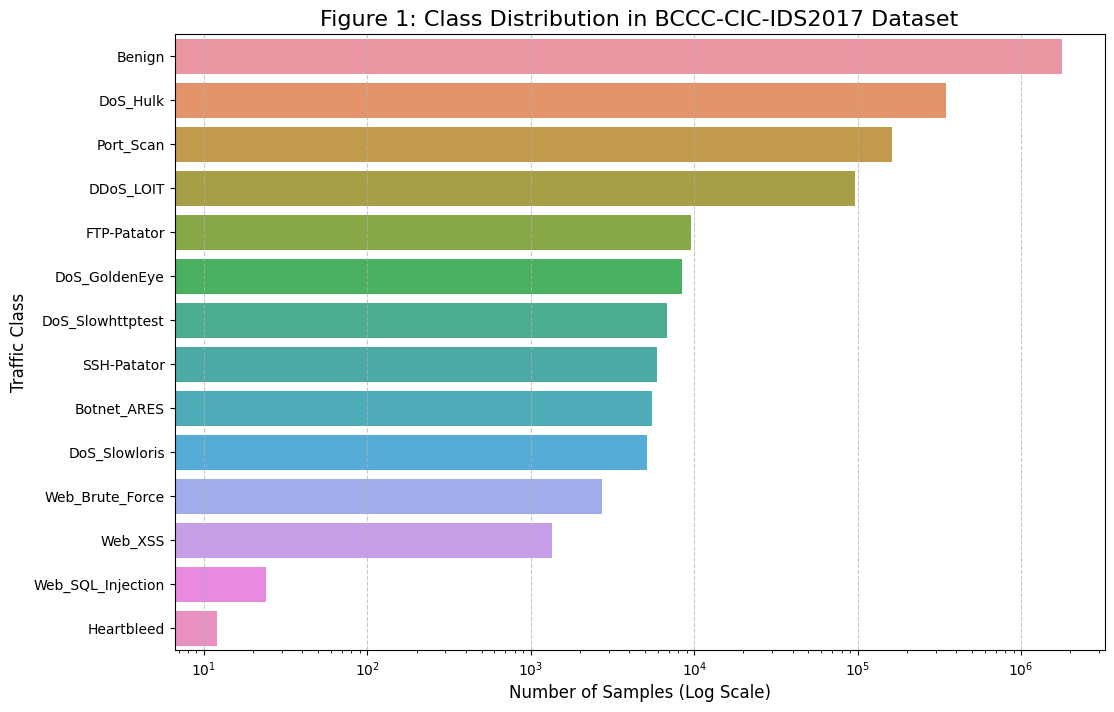


Generating and saving: 2. figure_2_vae_loss.png...


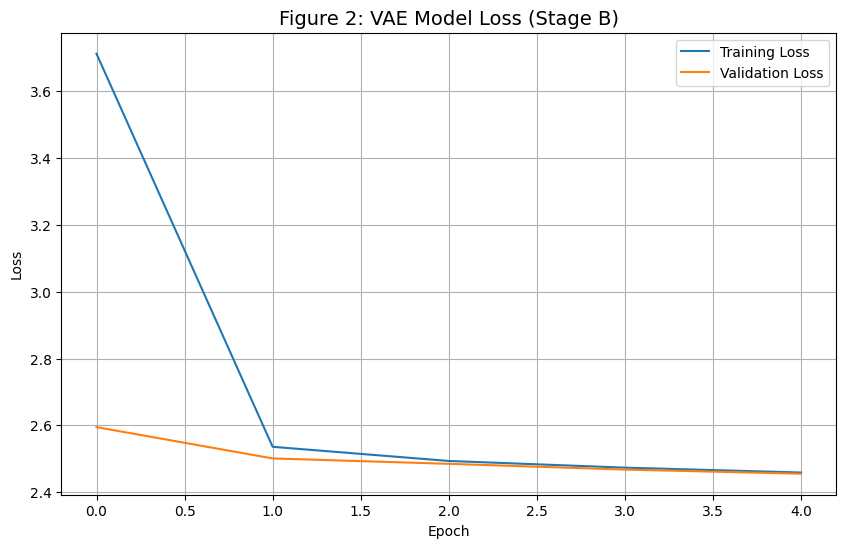


Generating and saving: 3. figure_3_cnn_accuracy.png...


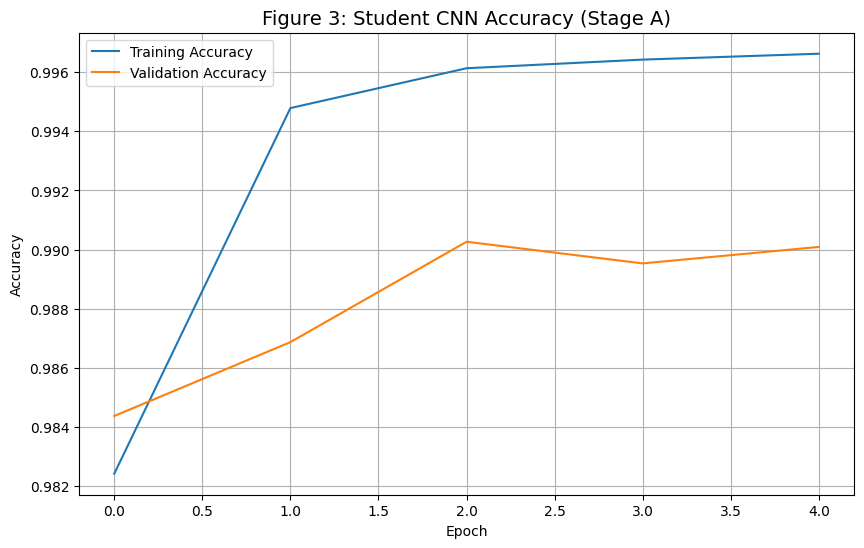


Generating and saving: 4. figure_4_cnn_loss.png...


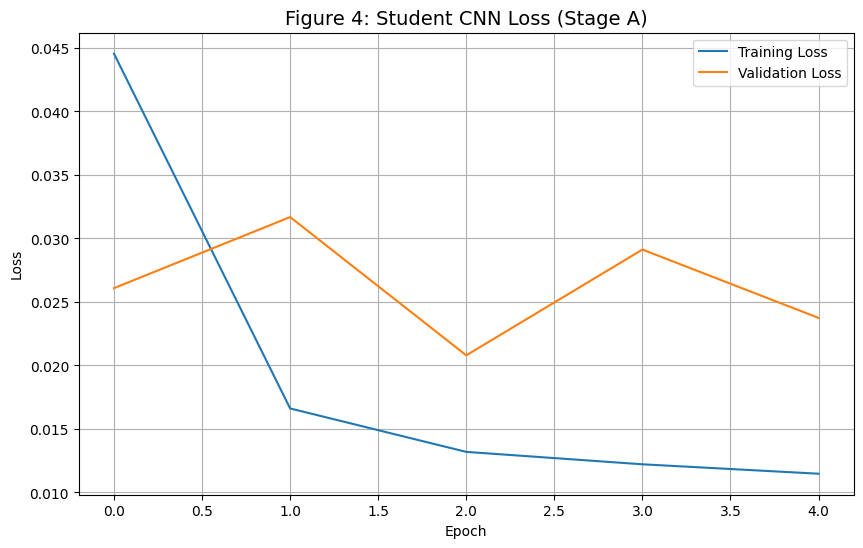


Generating and saving: 5. figure_5_vae_error_distribution.png...


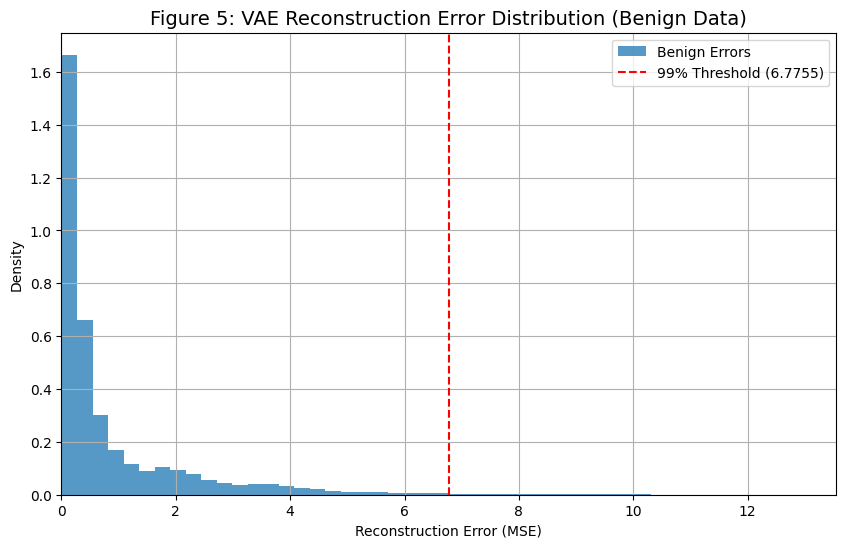


Generating and saving: 6. figure_6_confusion_matrix.png...


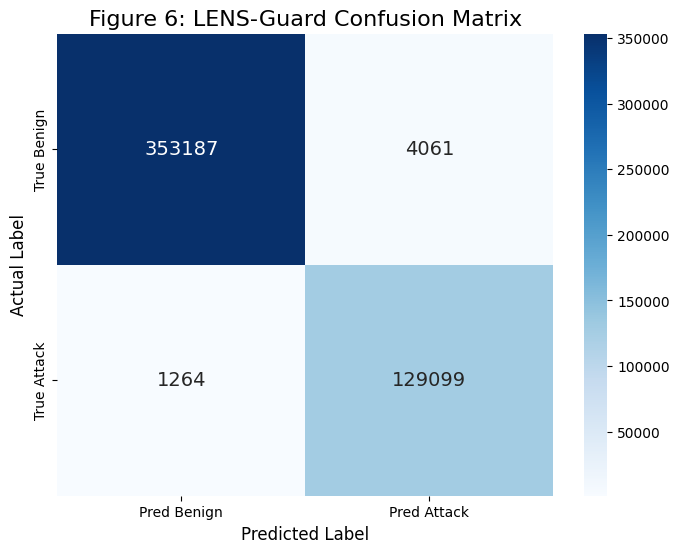


Generating and saving: 7. figure_7_roc_curve.png...


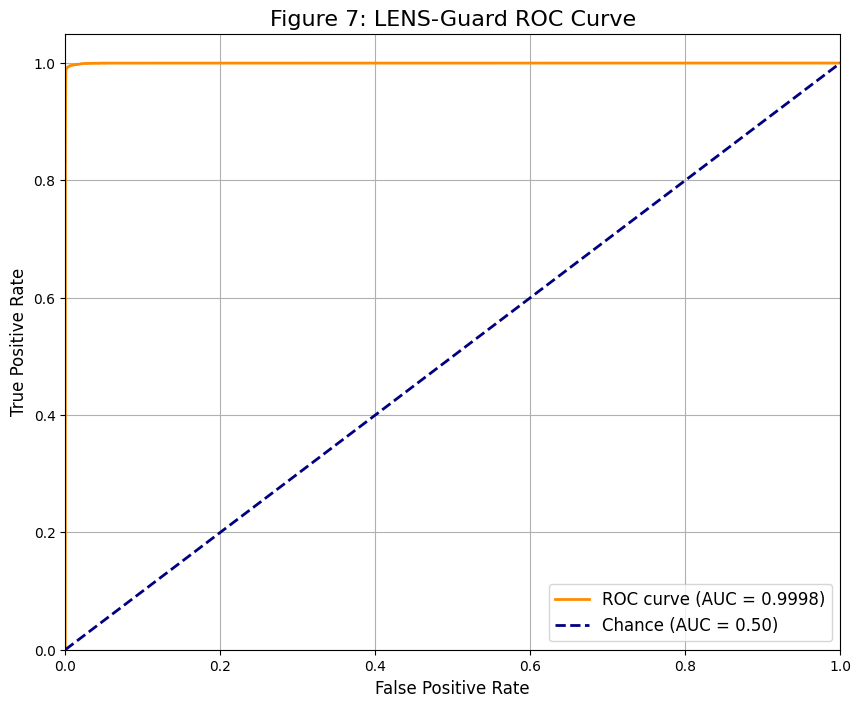


--- All 7 Figures Saved! ---
Your files are now in /kaggle/working/:
- figure_7_roc_curve.png
- figure_1_distribution.png
- figure_3_cnn_accuracy.png
- figure_2_training_history.png
- figure_2_vae_loss.png
- figure_4_cnn_loss.png
- figure_3_final_performance.png
- figure_6_confusion_matrix.png
- figure_5_vae_error_distribution.png

You can now download them from the 'Data' -> 'Output' tab in the sidebar.


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pandas as pd
import numpy as np
import os
from sklearn.metrics import confusion_matrix, roc_curve, auc

print("--- 19. Generating All Individual Figures ---")

# We will save at 300 DPI for high-quality publication
SAVE_DPI = 300

# --- Figure 1: Data Distribution ---
print("Generating and saving: 1. figure_1_distribution.png...")
try:
    # 1.1. Re-load data for labels
    train_data_path = "/kaggle/input/lens-guard/LENS_Guard/Train/Network Intrusion Detection (2024)/BCCC-CIC-IDS2017/BCCC-CIC-IDS-2017/"
    all_csv_files = glob.glob(train_data_path + "*.csv")
    label_list = []
    for file in all_csv_files:
        label_list.append(pd.read_csv(file, usecols=['label']))
    df_labels = pd.concat(label_list, ignore_index=True)
    label_counts = df_labels['label'].value_counts()

    # 1.2. Create Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(x=label_counts.values, y=label_counts.index, orient='h')
    plt.title('Figure 1: Class Distribution in BCCC-CIC-IDS2017 Dataset', fontsize=16)
    plt.xlabel('Number of Samples (Log Scale)', fontsize=12)
    plt.ylabel('Traffic Class', fontsize=12)
    plt.xscale('log') 
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # 1.3. Save Figure
    plt.savefig('figure_1_distribution.png', dpi=SAVE_DPI, bbox_inches='tight')
    plt.show()
    del df_labels # Clean memory

except Exception as e:
    print(f"Could not create Figure 1: {e}")

# --- Figure 2: VAE Training Loss ---
print("\nGenerating and saving: 2. figure_2_vae_loss.png...")
try:
    plt.figure(figsize=(10, 6))
    plt.plot(history_vae.history['loss'], label='Training Loss')
    plt.plot(history_vae.history['val_loss'], label='Validation Loss')
    plt.title('Figure 2: VAE Model Loss (Stage B)', fontsize=14)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.savefig('figure_2_vae_loss.png', dpi=SAVE_DPI, bbox_inches='tight')
    plt.show()

except NameError:
    print("Error: 'history_vae' not found. Please re-run Step 9.")
except Exception as e:
    print(f"Could not create Figure 2: {e}")

# --- Figure 3: CNN Training Accuracy ---
print("\nGenerating and saving: 3. figure_3_cnn_accuracy.png...")
try:
    plt.figure(figsize=(10, 6))
    plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
    plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Figure 3: Student CNN Accuracy (Stage A)', fontsize=14)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.savefig('figure_3_cnn_accuracy.png', dpi=SAVE_DPI, bbox_inches='tight')
    plt.show()

except NameError:
    print("Error: 'history_cnn' not found. Please re-run Step 10.")
except Exception as e:
    print(f"Could not create Figure 3: {e}")

# --- Figure 4: CNN Training Loss ---
print("\nGenerating and saving: 4. figure_4_cnn_loss.png...")
try:
    plt.figure(figsize=(10, 6))
    plt.plot(history_cnn.history['loss'], label='Training Loss')
    plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
    plt.title('Figure 4: Student CNN Loss (Stage A)', fontsize=14)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.savefig('figure_4_cnn_loss.png', dpi=SAVE_DPI, bbox_inches='tight')
    plt.show()

except NameError:
    print("Error: 'history_cnn' not found. Please re-run Step 10.")
except Exception as e:
    print(f"Could not create Figure 4: {e}")

# --- Figure 5: VAE Error Distribution ---
print("\nGenerating and saving: 5. figure_5_vae_error_distribution.png...")
try:
    plt.figure(figsize=(10, 6))
    plt.hist(errors, bins=100, alpha=0.75, label='Benign Errors', density=True)
    plt.axvline(anomaly_threshold, color='r', linestyle='--', label=f'99% Threshold ({anomaly_threshold:.4f})')
    plt.title('Figure 5: VAE Reconstruction Error Distribution (Benign Data)', fontsize=14)
    plt.xlabel('Reconstruction Error (MSE)')
    plt.ylabel('Density')
    plt.legend()
    plt.xlim(0, anomaly_threshold * 2) # Zoom in on the distribution
    plt.grid(True)
    plt.savefig('figure_5_vae_error_distribution.png', dpi=SAVE_DPI, bbox_inches='tight')
    plt.show()

except NameError:
    print("Error: 'errors' or 'anomaly_threshold' not found. Please re-run Step 11.")
except Exception as e:
    print(f"Could not create Figure 5: {e}")

# --- Figure 6: Confusion Matrix ---
print("\nGenerating and saving: 6. figure_6_confusion_matrix.png...")
try:
    cm = confusion_matrix(y_test_cnn, y_pred_lens_guard)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Pred Benign', 'Pred Attack'], 
                yticklabels=['True Benign', 'True Attack'],
                annot_kws={"size": 14})
    plt.title('Figure 6: LENS-Guard Confusion Matrix', fontsize=16)
    plt.ylabel('Actual Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.savefig('figure_6_confusion_matrix.png', dpi=SAVE_DPI, bbox_inches='tight')
    plt.show()

except NameError:
    print("Error: 'y_test_cnn' or 'y_pred_lens_guard' not found. Please re-run Step 12.")
except Exception as e:
    print(f"Could not create Figure 6: {e}")

# --- Figure 7: ROC Curve ---
print("\nGenerating and saving: 7. figure_7_roc_curve.png...")
try:
    fpr, tpr, thresholds = roc_curve(y_test_cnn, y_pred_cnn_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance (AUC = 0.50)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Figure 7: LENS-Guard ROC Curve', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(True)
    plt.savefig('figure_7_roc_curve.png', dpi=SAVE_DPI, bbox_inches='tight')
    plt.show()

except NameError:
    print("Error: 'y_test_cnn' or 'y_pred_cnn_proba' not found. Please re-run Step 12.")
except Exception as e:
    print(f"Could not create Figure 7: {e}")

# --- Confirmation ---
print("\n--- All 7 Figures Saved! ---")
print("Your files are now in /kaggle/working/:")
output_files = [f for f in os.listdir('/kaggle/working') if f.endswith('.png')]
for f in output_files:
    print(f"- {f}")
    
print("\nYou can now download them from the 'Data' -> 'Output' tab in the sidebar.")